<a href="https://colab.research.google.com/github/Mahhmudd/GIS/blob/main/Berlatih_Gis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persiapan Pertama kali**

Register or create a Google Cloud Project;

you'll be prompted to complete the following steps.

If you already have a project registered for Earth Engine access, skip to the next section.

- Select the project's purpose: commercial or noncommercial.
- If the purpose is noncommercial, select a project type.
- Create a new Google Cloud project or select an existing project.
- If the purpose is commercial, verify or set up billing for your project.
- Confirm your project information

In [13]:
# Untuk pertama kali install terlebih dahulu
!pip install geemap earthengine-api

In [2]:
# Selanjutnya tinggal update saja
!pip install -U geemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00


In [11]:
#Pertama kali Hubungkan akun gee yang sudah ada terlebih dahulu
!earthengine authenticate
# Yang nantinya akan meminta memasukkan token/code authentication

E0000 00:00:1746513905.714660    1869 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746513905.721767    1869 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Authenticate: Limited support in Colab. Use ee.Authenticate() or --auth_mode=notebook instead.
Authenticate: Credentials already exist.  Use --force to refresh.


In [8]:
#Panggil Library GEE
import ee
import geemap

In [9]:
#Setiap Buat Data Baru Aktifkan
ee.Authenticate()

In [10]:
# Inisiasi Library ke project yang telah dibuat
ee.Initialize(project='rifmudth-project')
#Berfungsi untuk menginisiasi library agar siap digunakan

# **Visualisaasi Peta**

In [ ]:
# Import the Image function from the IPython.display module.
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbURL({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

In [ ]:
# Create a map object.
m = geemap.Map() # < menggunkan Variabel 'm ;map ;dsb' untuk memanggil Modul/Fungsi untuk mempermudah analysis sesuai dg kebutuhan
# Bisa juga dengan mengisi koordinat di dalam Tanda Kurung (center=[20, 0], zoom=3)
# m = geemap.Map(center=[20, 0], zoom=3)

# Jika ingin menambahkan visualisasi tambahan
# Visualisasi bedasarkan Warna
vis_params= {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Add the elevation model to the map object.
m.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Tampilkan map.
display(m)

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# **MODUL/FUNGSI UMUM GEE**

In [ ]:
import ee.mapclient

# Membuat objek peta dengan centerMap
m = ee.mapclient.centerMap(121, -2, 8)

In [ ]:
# berfungsi Zoom in ke area center lokasi yang diinginkan
m.setCenter(121.166914633458155, -2.0663744146642038, 10)

## Menggambar dan menambahkan layer

In [ ]:
# Menambahkan Layer Point
var_point = ee.Geometry.Point([121.166914633458155, -2.0663744146642038]);
m.addLayer(var_point, {'color': 'blue'}, "My Point")

In [ ]:
# Menambahkan Layer Multi Point
var_mpoint = ee.Geometry.MultiPoint([[121.166914633458155, -2.0663744146642038], [121.21, -2.09], [121.25, -2.11]]);
m.addLayer(var_mpoint, {'color': 'blue'}, "My Multi Point")

In [ ]:
# Menambahkan layer Line
var_line = ee.Geometry.LineString([[121.166914633458155, -2.0663744146642038], [121.16, -2.068]])
m.addLayer(var_line, {'color': 'orange'}, "My Line")

In [ ]:
# Membuat MultiLineString yang terdiri dari dua garis terpisah
var_multi_line = ee.Geometry.MultiLineString([
  [[121.10, -2.40], [121.09, -2.41]],                 # Garis pertama
  [[121.07, -2.43], [121.06, -2.42], [121.05, -2.44]] # Garis kedua
])
m.addLayer(var_multi_line, {'color':'magenta'}, "May Multi Line")

In [ ]:
# Menambahkan Layer Polygon berupa Kotak
# Provide 4 coordinates: west, south, east, north
var_kotak = ee.Geometry.Rectangle([121.1, -2.1, 121.2, -2.0])
m.addLayer(var_kotak, {'color': 'red'}, "My Rectangle")

In [ ]:
# Menambahkan Layer Multi Polygon
# Provide 4 coordinates: west, south, east, north
var_multipol = ee.Geometry.MultiPolygon([[[121.1, -2.11], [121.2, -2.1], [121.3, -2.0], [121.1, -2.1]],
                                         [[121.2, -2.12], [121.4, -2.15], [121.5, -2.2], [121.16, -2.19]]])
m.addLayer(var_multipol, {'color': 'aqua'}, "My Multi Poly")

In [ ]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


# **Sentinel-2 Deep Resolution 3.0**


In [11]:
# Mengintregasikan Data dari Google Drive ke Colab/notebook ini yang akan dijalankan/ambil datnya dari drive
# Fitur ini hanya bisa dilakukan di Colab ini saja
from google.colab import drive
drive.mount('/content/drive') #lokasi penyimpanan data disesuaikan

KeyboardInterrupt: 

In [5]:
# 1 Install
!apt install -qq gdal-bin
## OPTIONAL: Lo link your Google Drive to store output files uncomment and modify the following line
#!ln -s /content/drive/MyDrive/MyDrive/S2DR3_outputs/content/output/ID


gdal-bin is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [7]:
# Make sure to select T4 GPU instance from the > Runtime > Change-runtime-type menu


!apt install -qq gdal-bin
!pip -q install https://storage.googleapis.com/0x7ff601307fa5/s2dr3-20250307.1-cp311-cp311-linux_x86_64.whl

gdal-bin is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [12]:
# 2 Tentukan Koordinat (WGS84)
# The model will process a 4x4 km bounding box around the target location
lon, lat = 119.867, -0.898 # Format X Y
point = ee.Geometry.Point([lon, lat])

In [13]:
# 3 Panggil Data Image Collection
collection = (
    ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")  # Before using 'COPERNICUS/S2_SR' the google has give warning about update
    .filterBounds(point)
    .filterDate('2023-01-01', '2025-04-30')
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))  # Limit Awan
    .sort('CLOUDY_PIXEL_PERCENTAGE')
)

In [14]:
# 4 Memeriksa Jumlah Gambar
# Verifica o número de imagens disponíveis ANTES de aplicar .toList()
n_images = collection.size().getInfo()

if n_images == 0:
  raise ValueError("Tidak ditemukan gambar dengan tingkat awan kurang dari 10% dalam rentang yang ditentukan.")

# Se houver imagens, pega a primeira e extrai a data
image = ee.Image(collection.first())
date = image.date().format('YYYY-MM-dd').getInfo()
print("Tanggal Terbaik Telah ditemukan:", date)


Tanggal Terbaik Telah ditemukan: 2023-09-26


In [15]:
# 5 Clear previous outputs
#clear output
import shutil
import os

# Replace {YOUR_OUTPUT_FOLDER} with the desired folder path on your Google Drive
# The output directory should be within your Google Drive, not in Colab's transient storage.
# For example, if you want to store output in "MyDrive/S2DR3_outputs", the path would be:
output_dir = '/content/output'
# Lokasi Penyimpanan Output
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

print("Output folder cleared!")

Output folder cleared!


Starting inference for (119.867, -0.898) on date 2023-09-26...


Fetching model: 100%|██████████| 829M/829M [00:37<00:00, 22.1MiB/s]


Fetching data for T50MRE-df1c23d9e-20230926 .......... done. 
Processing S2L2A_T50MRE-df1c23d9e-20230926_MS . done 
Postprocessing S2L2A_T50MRE-df1c23d9e-20230926_MS ......... done

Find results at the following path: /content/output
Click the link below for preview:

https://gamayos.github.io/gamma-earth-api/s2dr3-demo-20250305.html?ds=ID-T50MRE-df1c23d9e-20230926#15/-0.8980/119.8670



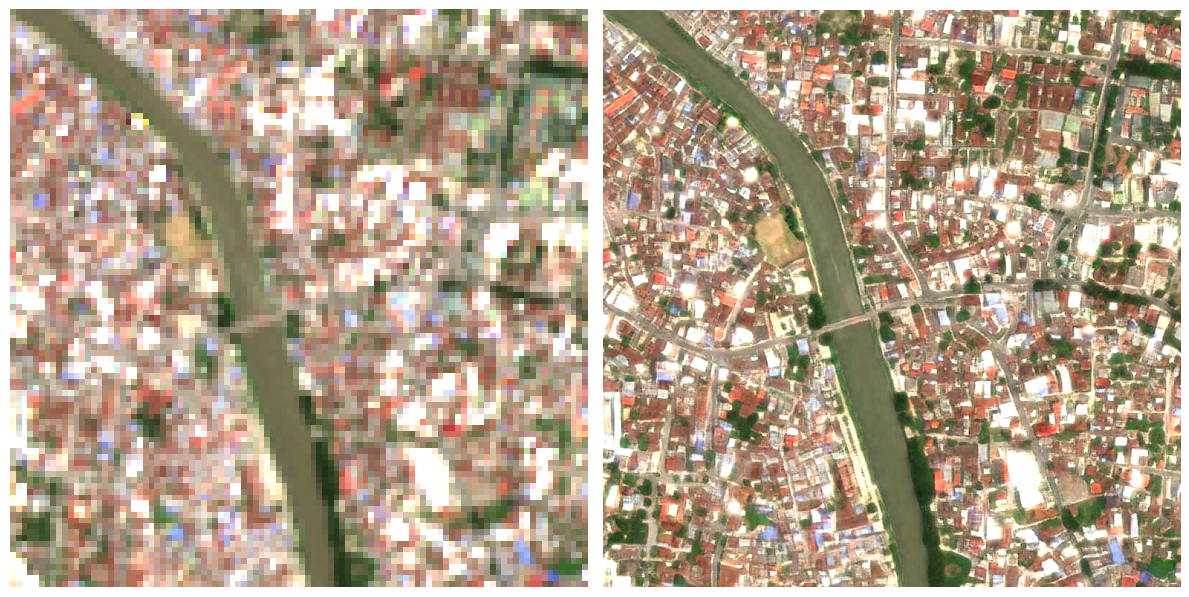

In [16]:
# 6 Penerapan Model S2DR3
import s2dr3.inferutils

# Specify the target date. Please note, S2DR3 model will process the date
# from the Sentinel-2 catalogue that is closest to the specified date.
# Selected date may be ocluded by clouds. Please consult the Copernucus
# Dataspace for data availability https://browser.dataspace.copernicus.eu
# Archive images are available from 2018-01-01.
# Specifies the target location in the format (longitude, latitude)
lonlat = (119.867, -0.898)
date = '2023-09-26'
# Use the previously defined 'date' variable based on the lowest cloud cover
# The processed image will have a resolution of 1 meter and will cover an area of ​​4x4 km

print(f"Starting inference for {lonlat} on date {date}...")
s2dr3.inferutils.test(lonlat, date) # Data output ada di content/output/ID


In [17]:
#Download Hasil ke GeoTIFF
from google.colab import files

# Default output path of the template
output_dir = '/content/output/ID/T50MRE/T50MRE-df1c23d9e' # < lokasi download hasil dari model

# List all generated .tif files
tif_files = [f for f in os.listdir(output_dir) if f.endswith('.tif')]

# Download each file
for filename in tif_files:
    file_path = os.path.join(output_dir, filename)
    print(f"Download: {filename}")
    files.download(file_path)

Download: S2L2A_T50MRE-df1c23d9e-20230926_TCI.tif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download: S2L2A_T50MRE-df1c23d9e-20230926_IRP.tif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download: S2L2Ax10_T50MRE-df1c23d9e-20230926_TCI.tif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download: S2L2Ax10_T50MRE-df1c23d9e-20230926_MS.tif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download: S2L2A_T50MRE-df1c23d9e-20230926_NDVI.tif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download: S2L2Ax10_T50MRE-df1c23d9e-20230926_IRP.tif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download: S2L2Ax10_T50MRE-df1c23d9e-20230926_NDVI.tif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download: S2L2A_T50MRE-df1c23d9e-20230926_MS.tif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model: **Gamma Earth** ([Artikel asli](https://medium.com/@ya_71389/c71a601a2253))

Implementasi: (Samuel Santos)

Proyek ini hanya demonstratif untuk tujuan pendidikan dan eksperimen, tanpa penggunaan komersial.

Kontak:

Untuk informasi lisensi atau penggunaan komersial S2DR3, silakan hubungi Gamma Earth: info@gamma.earth


# **Visualisasi dengan Chart**

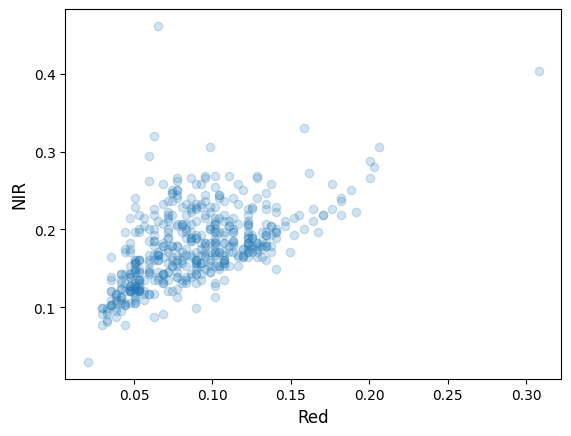

In [ ]:
# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

# Fetch a Landsat TOA image.
img = ee.Image('LANDSAT/LT05/C02/T1_TOA/LT05_034033_20000913')

# Select Red and NIR bands and sample 500 points.
samp_fc = img.select(['B3','B4']).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()